## 机器学习入门
易铎 yiduo@smzdm.com

2019年06月18日

## 项目背景
### 租金预测模型
收集链家上北京地区租金的信息，预测其他房源的租金

### 数据来源

In [89]:
from IPython.display import IFrame
IFrame('https://bj.lianjia.com/zufang/',width='100%',height=350)

## 项目初始化加载类库

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

## 数据读取

In [91]:
data = pd.read_csv("zufang.csv")

### 查看结果 

In [92]:
data

,西城-金融街 / 63㎡ /西北 / 2室1厅1卫 / 9000
0,通州-通州北苑 / 60㎡ /南 北 / 2室1厅1卫 / 4300
1,朝阳-CBD / 57㎡ /南 / 2室1厅1卫 / 7200
2,海淀-知春路 / 51㎡ /南 / 2室1厅1卫 / 7800
3,海淀-小西天 / 99㎡ /南 / 3室1厅1卫 / 12000
4,通州-梨园 / 51㎡ /北 / 1室1厅1卫 / 4300
5,东城-安贞 / 149㎡ /东 西 / 3室2厅2卫 / 15000
6,丰台-科技园区 / 105㎡ /东南 / 3室1厅1卫 / 7800
7,东城-蒲黄榆 / 54㎡ /南 北 / 2室1厅1卫 / 6300
8,西城-六铺炕 / 37㎡ /东 / 1室1厅1卫 / 5500
9,房山-良乡 / 94㎡ /南 北 / 1室1厅1卫 / 2600


### 文件分隔符 

In [93]:
data = pd.read_csv("zufang.csv" ,sep="/")

In [94]:
data.head()

,西城-金融街,63㎡,西北,2室1厅1卫,9000
0,通州-通州北苑,60㎡,南 北,2室1厅1卫,4300
1,朝阳-CBD,57㎡,南,2室1厅1卫,7200
2,海淀-知春路,51㎡,南,2室1厅1卫,7800
3,海淀-小西天,99㎡,南,3室1厅1卫,12000
4,通州-梨园,51㎡,北,1室1厅1卫,4300


### 设定数据表标题 

In [95]:
data = pd.read_csv("zufang.csv" ,sep = "/" , names= ["位置","面积","朝向","户型","租金"] )

In [96]:
data.head(10)

,位置,面积,朝向,户型,租金
0,西城-金融街,63㎡,西北,2室1厅1卫,9000
1,通州-通州北苑,60㎡,南 北,2室1厅1卫,4300
2,朝阳-CBD,57㎡,南,2室1厅1卫,7200
3,海淀-知春路,51㎡,南,2室1厅1卫,7800
4,海淀-小西天,99㎡,南,3室1厅1卫,12000
5,通州-梨园,51㎡,北,1室1厅1卫,4300
6,东城-安贞,149㎡,东 西,3室2厅2卫,15000
7,丰台-科技园区,105㎡,东南,3室1厅1卫,7800
8,东城-蒲黄榆,54㎡,南 北,2室1厅1卫,6300
9,西城-六铺炕,37㎡,东,1室1厅1卫,5500


### 数据分析

In [97]:
data.describe()

,租金
count,150.000000
mean,7366.666667
std,4263.638467
min,2600.000000
25%,5500.000000
50%,6650.000000
75%,7775.000000
max,40000.000000


## 数据预处理 

### 字符串分割 

In [98]:
data_weizhi=data["位置"].str.split('-',expand=True)

In [99]:
data_weizhi.columns=["区","商圈"]

In [100]:
data_weizhi.tail()

,区,商圈
145,昌平,回龙观
146,朝阳,劲松
147,西城,月坛
148,西城,天宁寺
149,亦庄开发区,亦庄


### 数据表合并

In [101]:
data=pd.merge(left=data,right=data_weizhi,left_index=True,right_index=True)

In [102]:
data

,位置,面积,朝向,户型,租金,区,商圈
0,西城-金融街,63㎡,西北,2室1厅1卫,9000,西城,金融街
1,通州-通州北苑,60㎡,南 北,2室1厅1卫,4300,通州,通州北苑
2,朝阳-CBD,57㎡,南,2室1厅1卫,7200,朝阳,CBD
3,海淀-知春路,51㎡,南,2室1厅1卫,7800,海淀,知春路
4,海淀-小西天,99㎡,南,3室1厅1卫,12000,海淀,小西天
5,通州-梨园,51㎡,北,1室1厅1卫,4300,通州,梨园
6,东城-安贞,149㎡,东 西,3室2厅2卫,15000,东城,安贞
7,丰台-科技园区,105㎡,东南,3室1厅1卫,7800,丰台,科技园区
8,东城-蒲黄榆,54㎡,南 北,2室1厅1卫,6300,东城,蒲黄榆
9,西城-六铺炕,37㎡,东,1室1厅1卫,5500,西城,六铺炕


### 数据切片 

In [103]:
data[data["区"]=="海淀"]

,位置,面积,朝向,户型,租金,区,商圈
3,海淀-知春路,51㎡,南,2室1厅1卫,7800,海淀,知春路
4,海淀-小西天,99㎡,南,3室1厅1卫,12000,海淀,小西天
26,海淀-双榆树,59㎡,东南,2室1厅1卫,8000,海淀,双榆树
38,海淀-牡丹园,43㎡,南,1室1厅1卫,5800,海淀,牡丹园
41,海淀-定慧寺,39㎡,南,1室0厅1卫,5300,海淀,定慧寺
52,海淀-公主坟,64㎡,南 北,2室1厅1卫,6500,海淀,公主坟
59,海淀-五棵松,57㎡,南 北,2室1厅1卫,7300,海淀,五棵松
61,海淀-紫竹桥,41㎡,南,1室1厅1卫,5500,海淀,紫竹桥
64,海淀-紫竹桥,120㎡,南 北,3室1厅1卫,10000,海淀,紫竹桥
78,海淀-五道口,41㎡,西,1室0厅1卫,7800,海淀,五道口


### 数据清洗 

In [104]:
data = data[data["租金"]!=40000]
data.describe()

,租金
count,149.000000
mean,7147.651007
std,3325.303967
min,2600.000000
25%,5500.000000
50%,6600.000000
75%,7700.000000
max,26000.000000


### 字符串替换

In [105]:
data = data.copy()
#data["面积_数"]=data["面积"].str.replace("㎡",'')
data.loc[:,"面积_数"]=data.loc[:,"面积"].str.replace("㎡",'')

In [106]:
data

,位置,面积,朝向,户型,租金,区,商圈,面积_数
0,西城-金融街,63㎡,西北,2室1厅1卫,9000,西城,金融街,63
1,通州-通州北苑,60㎡,南 北,2室1厅1卫,4300,通州,通州北苑,60
2,朝阳-CBD,57㎡,南,2室1厅1卫,7200,朝阳,CBD,57
3,海淀-知春路,51㎡,南,2室1厅1卫,7800,海淀,知春路,51
4,海淀-小西天,99㎡,南,3室1厅1卫,12000,海淀,小西天,99
5,通州-梨园,51㎡,北,1室1厅1卫,4300,通州,梨园,51
6,东城-安贞,149㎡,东 西,3室2厅2卫,15000,东城,安贞,149
7,丰台-科技园区,105㎡,东南,3室1厅1卫,7800,丰台,科技园区,105
8,东城-蒲黄榆,54㎡,南 北,2室1厅1卫,6300,东城,蒲黄榆,54
9,西城-六铺炕,37㎡,东,1室1厅1卫,5500,西城,六铺炕,37


### 转换数字

In [107]:
data["面积_数"]=pd.to_numeric(data["面积_数"])

In [108]:
data

,位置,面积,朝向,户型,租金,区,商圈,面积_数
0,西城-金融街,63㎡,西北,2室1厅1卫,9000,西城,金融街,63
1,通州-通州北苑,60㎡,南 北,2室1厅1卫,4300,通州,通州北苑,60
2,朝阳-CBD,57㎡,南,2室1厅1卫,7200,朝阳,CBD,57
3,海淀-知春路,51㎡,南,2室1厅1卫,7800,海淀,知春路,51
4,海淀-小西天,99㎡,南,3室1厅1卫,12000,海淀,小西天,99
5,通州-梨园,51㎡,北,1室1厅1卫,4300,通州,梨园,51
6,东城-安贞,149㎡,东 西,3室2厅2卫,15000,东城,安贞,149
7,丰台-科技园区,105㎡,东南,3室1厅1卫,7800,丰台,科技园区,105
8,东城-蒲黄榆,54㎡,南 北,2室1厅1卫,6300,东城,蒲黄榆,54
9,西城-六铺炕,37㎡,东,1室1厅1卫,5500,西城,六铺炕,37


In [109]:
data.describe()

,租金,面积_数
count,149.000000,149.000000
mean,7147.651007,62.939597
std,3325.303967,29.888357
min,2600.000000,24.000000
25%,5500.000000,45.000000
50%,6600.000000,56.000000
75%,7700.000000,67.000000
max,26000.000000,204.000000


### 解出户型信息

In [110]:
data[['室', '厅', '卫']] = data['户型'].str.extract('(\d+)室(\d+)厅(\d+)卫', expand=False)
data['室']= pd.to_numeric(data['室'])
data['厅']= pd.to_numeric(data['厅'])
data['卫']= pd.to_numeric(data['卫'])
data["房间数"] = data["室"]+data["厅"]+data["卫"]

In [111]:
data.head()

,位置,面积,朝向,户型,租金,区,商圈,面积_数,室,厅,卫,房间数
0,西城-金融街,63㎡,西北,2室1厅1卫,9000,西城,金融街,63,2,1,1,4
1,通州-通州北苑,60㎡,南 北,2室1厅1卫,4300,通州,通州北苑,60,2,1,1,4
2,朝阳-CBD,57㎡,南,2室1厅1卫,7200,朝阳,CBD,57,2,1,1,4
3,海淀-知春路,51㎡,南,2室1厅1卫,7800,海淀,知春路,51,2,1,1,4
4,海淀-小西天,99㎡,南,3室1厅1卫,12000,海淀,小西天,99,3,1,1,5


### 画图分析 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24dfabe0>,
      dtype=object)

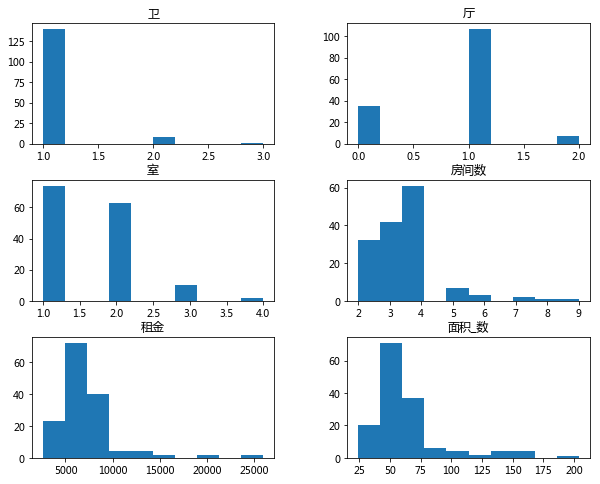

In [112]:
data.hist(figsize=[10,8],grid=False)

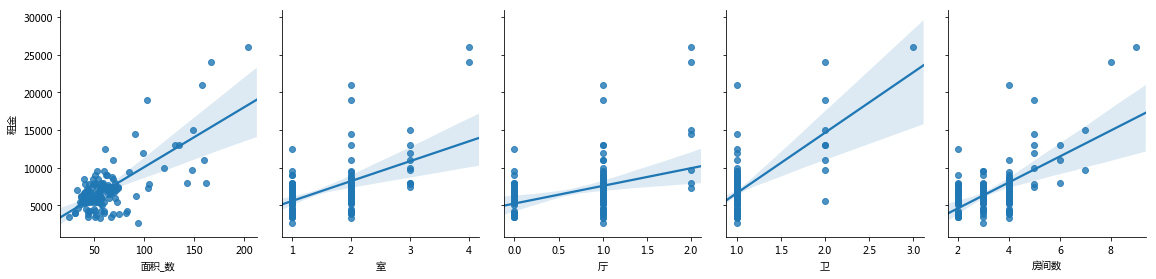

In [113]:
sns.pairplot(data, x_vars=['面积_数','室','厅','卫','房间数'], y_vars='租金', size=4, aspect=0.8, kind='reg')

In [114]:
markercolor = data['室']
markersize = data['面积_数']/data['房间数']/2
fig1 = go.Scatter3d(x=data['面积_数'],
                    y=data['房间数'],
                    z=data['租金'],
                    marker=dict(size=markersize,
                                
                                opacity=0.8,
                                
                                color=markercolor,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers'
                    )

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="面积"),
                                yaxis=dict( title="房间数"),
                                zaxis=dict(title="租金"))
                    )
iplot({"data": [fig1], "layout": mylayout})

### onehot 处理*

In [115]:
chaxiang = pd.get_dummies(data['朝向'],prefix='朝向是')
qu = pd.get_dummies(data['区'],prefix='地区是')
shangquan = pd.get_dummies(data['商圈'],prefix='商圈是')
shi = pd.get_dummies(data['室'],prefix='室数量是')
ting = pd.get_dummies(data['厅'],prefix='厅数量是')
wei = pd.get_dummies(data['卫'],prefix='卫数量是')


In [116]:
shi

,室数量是_1,室数量是_2,室数量是_3,室数量是_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,1,0,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,1,0,0,0


## 模型建立

### 模型介绍

线性回归公式
$$y =w_0+x_1\times w_1+x_2\times w_2+x_3\times w_3+ \cdots+x_n\times w_n$$

### 对 X 赋值 

In [117]:
X = pd.DataFrame()
#X = pd.concat([X,chaxiang],axis=1)
X = pd.concat([X,qu],axis=1)
#X = pd.concat([X,shangquan],axis=1)
X = pd.concat([X,shi],axis=1)
X = pd.concat([X,ting],axis=1)
X = pd.concat([X,wei],axis=1)
X = pd.concat([X,data["面积_数"]],axis=1)
X = pd.concat([X,data["房间数"]],axis=1)
X

,地区是_东城,地区是_丰台,地区是_亦庄开发区,地区是_大兴,地区是_房山,地区是_昌平,地区是_朝阳,地区是_海淀,地区是_石景山,地区是_西城,...,室数量是_3,室数量是_4,厅数量是_0,厅数量是_1,厅数量是_2,卫数量是_1,卫数量是_2,卫数量是_3,面积_数,房间数
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,63,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,60,4
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,57,4
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,51,4
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,99,5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,51,3
6,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,149,7
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,105,5
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,54,4
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,37,3


### 对 Y 赋值 

In [118]:
y = data["租金"]

### 分割训练测试数据 

In [119]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = 1)

In [120]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(104, 24) (104,)
(45, 24) (45,)


In [121]:
X_train

,地区是_东城,地区是_丰台,地区是_亦庄开发区,地区是_大兴,地区是_房山,地区是_昌平,地区是_朝阳,地区是_海淀,地区是_石景山,地区是_西城,...,室数量是_3,室数量是_4,厅数量是_0,厅数量是_1,厅数量是_2,卫数量是_1,卫数量是_2,卫数量是_3,面积_数,房间数
45,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,64,2
56,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,74,4
39,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,143,6
36,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,43,2
117,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,158,4
139,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,60,4
119,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,45,4
126,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,60,4
85,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,42,3
100,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,44,3


In [122]:
y_train

45      7700
56      7500
39      8000
36      7200
117    21000
139     5500
119     7800
126     4000
85      6600
100     6300
122     4200
94      8800
11     14500
132     5500
95      6200
12      3300
2       7200
97      6600
113     3500
104     3800
6      15000
127     5700
110     7000
65      3400
55      7000
78      7800
125     6700
46      6600
62      7300
74      8500
       ...  
47      5600
116     8000
13      5500
88      5500
8       6300
81      3800
60      8000
0       9000
1       4300
57      6800
22      6800
61      5500
63      7300
7       7800
86      5500
96      6000
68      6500
50      5400
101     5500
20      8500
25      6300
135     7100
71      7800
130     7000
79      4000
134     6000
138     7300
72      7500
141     6000
37      7500
Name: 租金, Length: 104, dtype: int64

## 模型训练 

### 设定算法 

In [123]:
#clf = DecisionTreeClassifier()
clf = LinearRegression()

### 模型拟合

In [124]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 模型预测

In [125]:
y_pred = clf.predict(X_test)

### 分析结果 

In [126]:
data_result = pd.DataFrame({'租金':y_test,"预测租金":y_pred})
data_result

,租金,预测租金
146,6100,7027.617998
89,7500,6499.317466
54,9000,6414.904813
77,4300,4373.335658
84,6000,7699.413817
106,6700,8457.482088
91,7500,5722.876818
53,4500,5488.559770
44,12500,7046.628373
59,7300,7825.758529


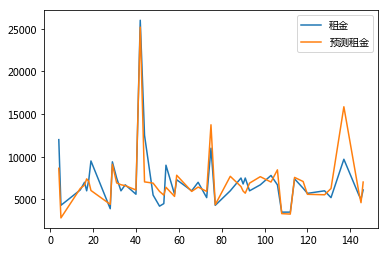

In [127]:
data_result.sort_index(inplace=True)
data_result.plot()

##  模型评估

### RMSE

$$
\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=1}^{n_\text{samples} } (y_i - \hat{y}_i)^2} 
$$

In [128]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % rmse)

RMSE: 1732.4


### 决定系数 R2

决定系数（英语：coefficient of determination，记为$R^2$或$r^2$）在统计学中用于度量因变量的变异中可由自变量解释部分所占的比例，

以此来判断统计模型的解释力。

https://zh.wikipedia.org/wiki/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0

https://en.wikipedia.org/wiki/Coefficient_of_determination

公式
$R^2 = 1-\frac{SS_{res}}{SS_{tot}}$

$SS_{res} = \sum_{1}^{i}{(y_i-f_i)^2}$

$SS_{tot} = \sum_{1}^{i}{(y_i-\bar y )^2}$

<img src="//upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/400px-Coefficient_of_Determination.svg.png" width="40%">


In [129]:
R2 = r2_score(y_test, y_pred)
print("R2: %.3f" % R2)

R2: 0.754


## 模型分析 

### 截距

In [130]:
print("w0: %.1f" % clf.intercept_)

w0: -589.2


### 特征权重

In [131]:
df_result=pd.DataFrame(data={'特征': X.columns, '权重': clf.coef_})
df_result

,特征,权重
0,地区是_东城,1719.029247
1,地区是_丰台,312.096836
2,地区是_亦庄开发区,1460.001806
3,地区是_大兴,-2343.616920
4,地区是_房山,-4493.511909
5,地区是_昌平,-712.587597
6,地区是_朝阳,1535.293284
7,地区是_海淀,2207.089103
8,地区是_石景山,1148.578516
9,地区是_西城,2840.777908


In [132]:
y17 = clf.intercept_+1719.029246661742+242.934536532912-716.6980345163298-1055.5373253301414+58*63.17235597527702+4*1034.0931950693737
y17

7400.871028596881